## without spectroscopic priors

In [1]:
from glob import glob

dir_list = glob('../isochrones/without_spec/*')
dir_list

['../isochrones/without_spec/NIR', '../isochrones/without_spec/NIR_optical']

In [2]:
import pandas as pd

dfs = {}
for dir in dir_list:
    df = pd.read_hdf(dir+'/mist_starmodel_single.h5', key='derived_samples')
    name = dir.split('/')[-1]
    dfs[name] = df

Text(0.5, 0.93, 'without spectroscopic priors')

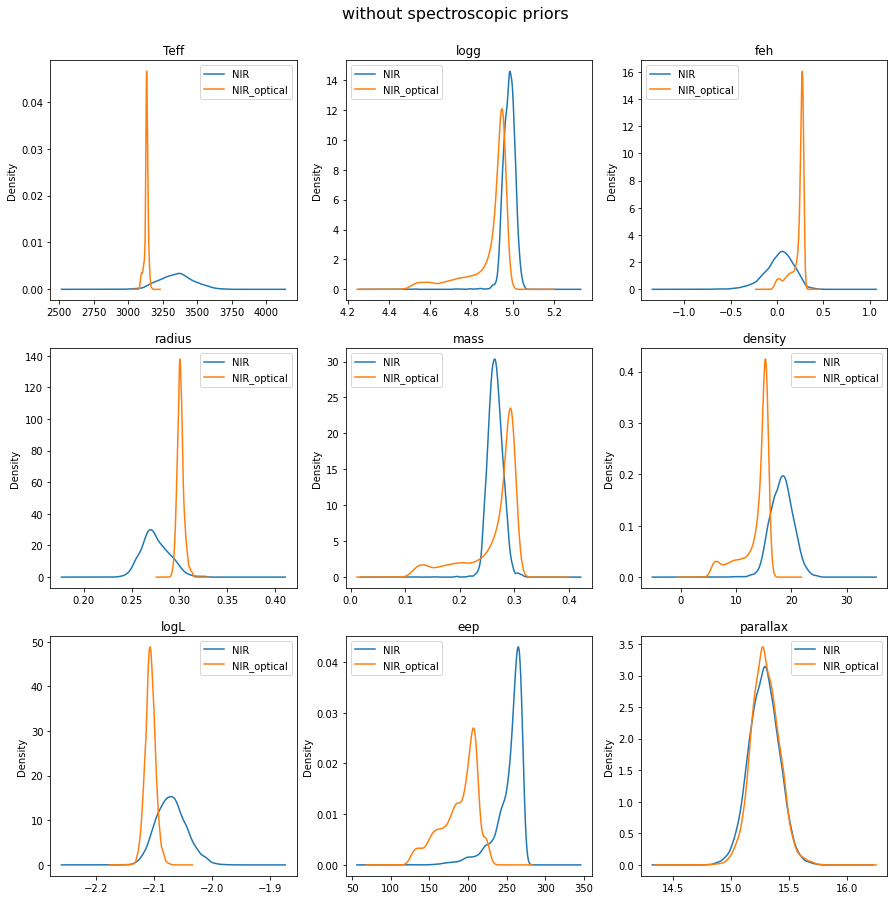

In [3]:
import matplotlib.pyplot as pl

params = 'Teff logg feh radius mass density logL eep parallax'.split()

fig, axs = pl.subplots(3, 3, figsize=(15,15))
ax = axs.flatten()

medians = {}
uncs = {}
for n,param in enumerate(params):
    medians[param] = {}
    uncs[param] = {}
    for key in dfs.keys():
        medians[param][key] = dfs[key][param].median()
        uncs[param][key] = dfs[key][param].std()
        _ = dfs[key][param].plot.kde(ax=ax[n], label=key)
        ax[n].set_title(param)
        ax[n].legend()
fig.suptitle('without spectroscopic priors', y=0.93, fontsize=16)

In [4]:
for param in medians:
    diff =  abs(medians[param]['NIR']-medians[param]['NIR_optical'])
    print(f"{param}: {diff/uncs[param]['NIR']:.2f}, {diff/uncs[param]['NIR_optical']:.2f}")

Teff: 1.81, 16.11
logg: 1.50, 0.41
feh: 1.42, 2.98
radius: 1.90, 7.87
mass: 1.55, 0.43
density: 1.65, 1.25
logL: 1.38, 4.00
eep: 3.45, 2.70
parallax: 0.04, 0.05


In [5]:
fig.savefig('../isochrones/isochrones_comparison_wo_priors.pdf', bbox_inches='tight')

## with spectroscopic priors

In [5]:
from glob import glob

dir_list2 = glob('../isochrones/with_spec/*')
dir_list2

['../isochrones/with_spec/NIR', '../isochrones/with_spec/NIR_optical']

In [6]:
import pandas as pd

dfs2 = {}
for dir in dir_list2:
    df = pd.read_hdf(dir+'/mist_starmodel_single.h5', key='derived_samples')
    name = dir.split('/')[-1]
    dfs2[name] = df

Text(0.5, 0.93, 'with spectroscopic priors')

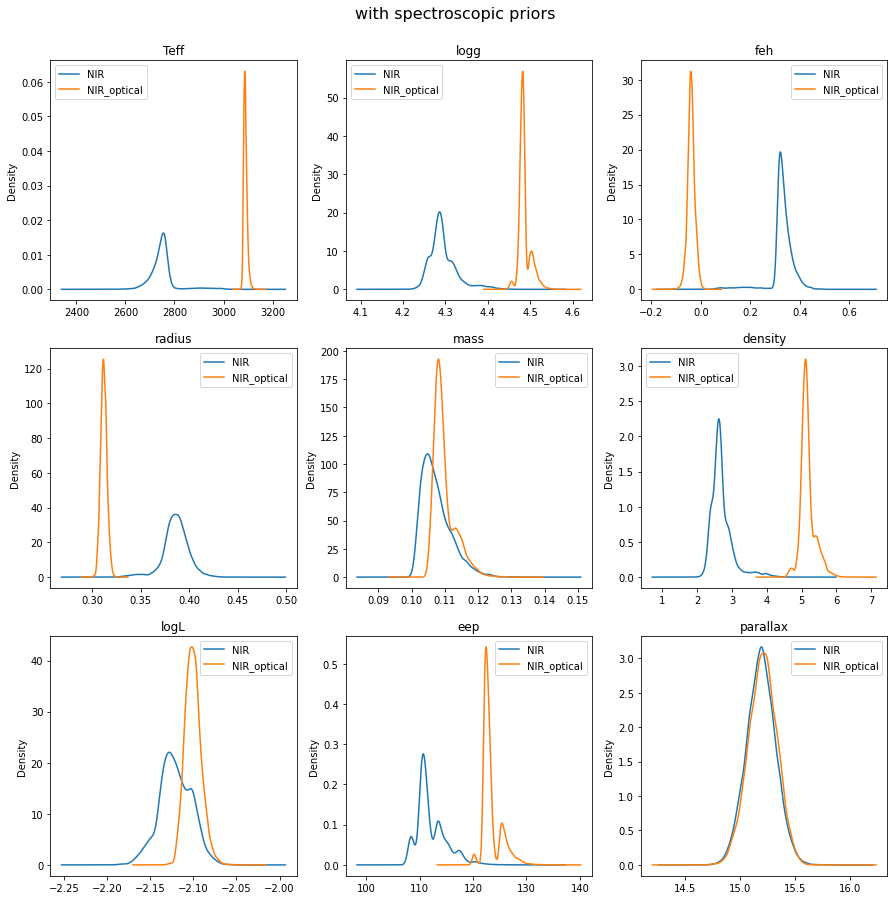

In [7]:
import matplotlib.pyplot as pl

params = 'Teff logg feh radius mass density logL eep parallax'.split()

fig2, axs = pl.subplots(3, 3, figsize=(15,15))
ax = axs.flatten()

for n,param in enumerate(params):
    for key in dfs2.keys():
        _ = dfs2[key][param].plot.kde(ax=ax[n], label=key)
        ax[n].set_title(param)
        ax[n].legend()
fig2.suptitle('with spectroscopic priors', y=0.93, fontsize=16)

In [17]:
fig2.savefig('../isochrones/isochrones_comparison_w_priors.pdf', bbox_inches='tight')

adding optical photometry appears to siginifantly bias the stellar parameters

## with vs without: NIR

Text(0.5, 0.93, 'NIR+parallax')

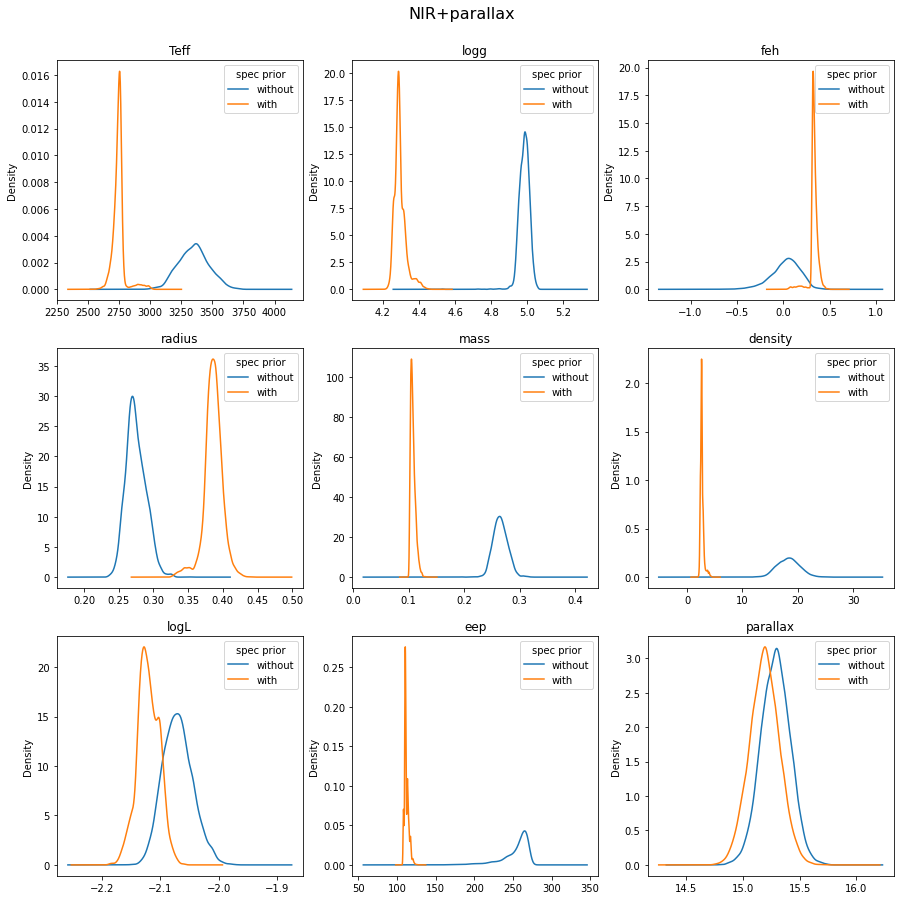

In [8]:
fig3, axs = pl.subplots(3, 3, figsize=(15,15))
ax = axs.flatten()

key1 = 'NIR'

for n,param in enumerate(params):
    _ = dfs[key1][param].plot.kde(ax=ax[n], label='without')
    _ = dfs2[key1][param].plot.kde(ax=ax[n], label='with')
    ax[n].set_title(param)
    ax[n].legend(title='spec prior')
fig3.suptitle('NIR+parallax', y=0.93, fontsize=16)

In [24]:
fig3.savefig('../isochrones/isochrones_comparison_w_wo_priors_NIR.pdf', bbox_inches='tight')

## with vs without: NIR+optical

Text(0.5, 0.93, 'NIR+optical+parallax')

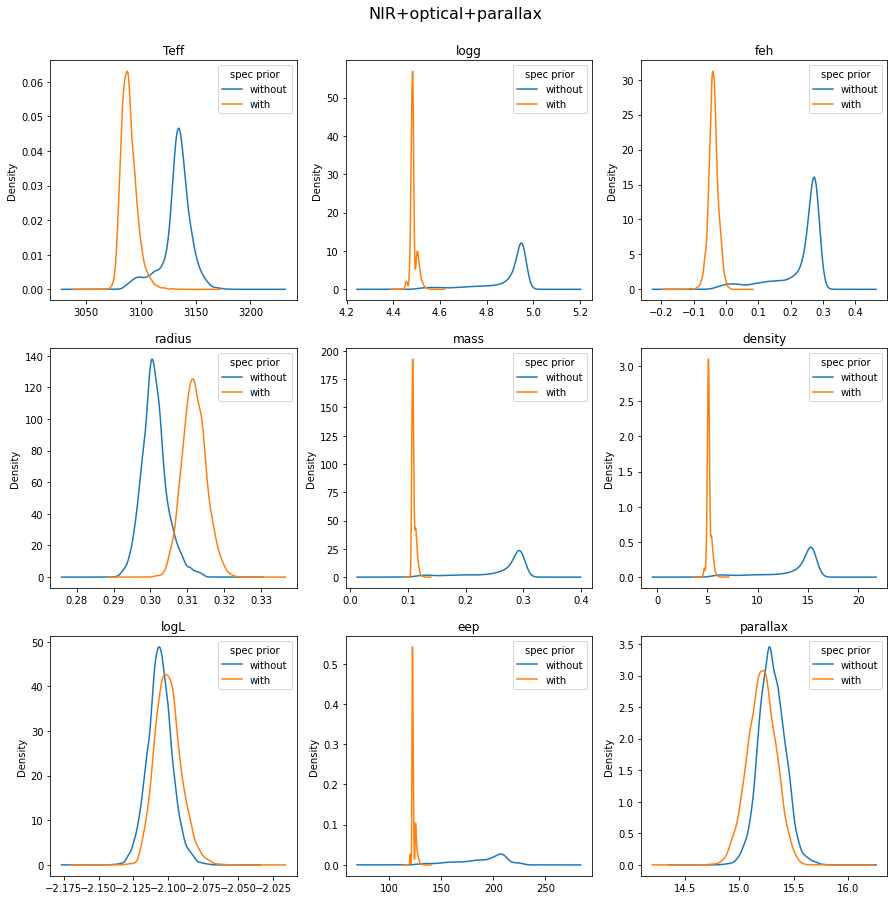

In [9]:
fig4, axs = pl.subplots(3, 3, figsize=(15,15))
ax = axs.flatten()

key2 = 'NIR_optical'

for n,param in enumerate(params):
    _ = dfs[key2][param].plot.kde(ax=ax[n], label='without')
    _ = dfs2[key2][param].plot.kde(ax=ax[n], label='with')
    ax[n].set_title(param)
    ax[n].legend(title='spec prior')
fig4.suptitle('NIR+optical+parallax', y=0.93, fontsize=16)

In [22]:
fig4.savefig('../isochrones/isochrones_comparison_w_wo_priors_NIR_optical.pdf', bbox_inches='tight')